(quick-start:top)=
# Quick Start

If you are familiar with using a REST based API already, this page contains some of the most common operations you are likely to want to use with our API.

If you are not familiar with REST APIs, we can recommend reading [Introduction to Populating a Website with API Data ](https://programminghistorian.org/en/lessons/introduction-to-populating-a-website-with-api-data) from the excellent [Programming Historian](https://programminghistorian.org) site.

You might also find the worked examples at our [Data Explorations](https://developers.vam.ac.uk/notebooks/) site useful to see how you can explore the collection data within a Jupyter notebook.

In [5]:
import sys
sys.path.append("/home/richard/Notebooks/2020/Ivpy/ivpy/src/")
from ivpy import attach,show,compose,montage,histogram,scatter

## Retrieve a single object record

The simplest operation. If you already know the system number assigned to the object you want to retrieve, then you can just retrieve it with a GET request.

In [1]:
import requests
req = requests.get('https://api.vam.ac.uk/v2/museumobject/O828146')
object_data = req.json()
print("The object you requested has the title '%s'" % object_data["record"]["titles"][0]["title"])

The object you requested has the title 'Picturesque Holland'


Here we just print out the first ('primary') title from the record. An overview of the most commonly used fields is in {ref}`object-fields-summary:top`.

## Searching object record(s)

If you are looking for records that match some word(s), you can use the 'q' parameter to query all fields in all object records and return those that match. Below we are searching for any records with the word 'Etruria'

In [3]:
import requests
import pandas as pd

object_df = pd.read_csv("https://api.vam.ac.uk/v2/objects/search?q=Etruria&page_size=45&response_format=csv")
object_df.head()

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,S.1897-2013,O1263636,Dish,Mr Punch dish,Staffordshire,Wedgwood of Etruria and Barlaston,makers,mid 20th century,2013GL4747,earthenware,moulding,NaN,In store,False,False
1,E.2084-1949,O596454,Watercolour,"Wedgwood Works, Etruria",Etruria,Puller,artist,1943,2008BV7718,watercolour,painting,NaN,"Prints & Drawings Study Room, level H",False,False
2,CIRC.737&A-1956,O308545,Teapot and cover,NaN,england,Etruria,NaN,c.1785,2019LN7745,stoneware,NaN,NaN,In store,False,False
3,C.307-1951,O278785,Plate,NaN,england,Etruria,NaN,c.1812-1816,2010EC4842,porcelain,NaN,NaN,"Ceramics, Room 139, The Curtain Foundation Gal...",False,False
4,C.129 to A-1956,O332163,Vase and cover,NaN,Staffordshire,Etruria,NaN,1869,2019LX6435,stoneware,NaN,NaN,In store,False,False


```{note}
Some other common parameters you might want to use with searching and filtering are:
  * Pagination (page_size, page_offset) - Allow you to request results of different sizes and to page through them if more results than fit in a page
  * Ordering (order_by) - Order the results in particular order
  * Order Direction (order_sort) - Sort the results in a direction (increasing/decreasing)

See {ref}`restriction:top` for full details on these parameters, see {ref}`searching:top` on problems you might encounter with searching across all fields and how you might find more relevant results using more selective search parameters.
```

Let's look at the object images (when these are available) all in one go using the [Ivpy](https://github.com/damoncrockett/ivpy) library. First we need to turn the image identifier into a IIIF URL first, using a fixed pattern to request a (maximum of) 100 by 100 pixel thumbnail image.

In [4]:
IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
object_df._primaryImageId = [IIIF_IMAGE_URL % item for item in object_df._primaryImageId]
object_df.head()

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,S.1897-2013,O1263636,Dish,Mr Punch dish,Staffordshire,Wedgwood of Etruria and Barlaston,makers,mid 20th century,https://framemark.vam.ac.uk/collections/2013GL...,earthenware,moulding,NaN,In store,False,False
1,E.2084-1949,O596454,Watercolour,"Wedgwood Works, Etruria",Etruria,Puller,artist,1943,https://framemark.vam.ac.uk/collections/2008BV...,watercolour,painting,NaN,"Prints & Drawings Study Room, level H",False,False
2,CIRC.737&A-1956,O308545,Teapot and cover,NaN,england,Etruria,NaN,c.1785,https://framemark.vam.ac.uk/collections/2019LN...,stoneware,NaN,NaN,In store,False,False
3,C.307-1951,O278785,Plate,NaN,england,Etruria,NaN,c.1812-1816,https://framemark.vam.ac.uk/collections/2010EC...,porcelain,NaN,NaN,"Ceramics, Room 139, The Curtain Foundation Gal...",False,False
4,C.129 to A-1956,O332163,Vase and cover,NaN,Staffordshire,Etruria,NaN,1869,https://framemark.vam.ac.uk/collections/2019LX...,stoneware,NaN,NaN,In store,False,False


Now we've updated the \_primaryImageId column to contain the full URL to get a thumbnail image, we can pass this to the attach method from Ivpy to tell it to use that field to create a montage of all the images.

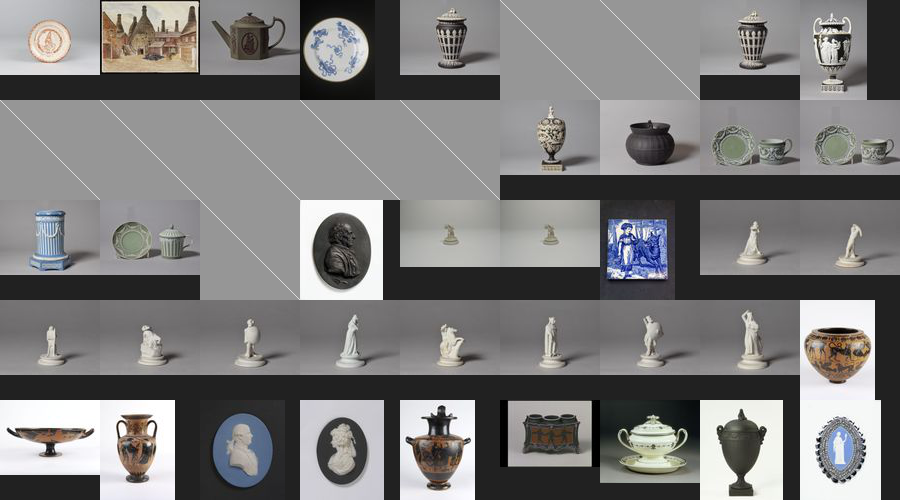

In [6]:
attach(object_df, "_primaryImageId")
show()

Some of the objects don't have images hence the gaps, we could remove those by adding the parameter 'images_exist=1' to our query to only retrieve objects with images.

## Filtering object records(s)

Rather than searching for words occuring anywhere in a record, filtering matches identifiers assigned to a concept such as a type of material, a production technnique, a person, etc. For example, to find all object records that mention the use of 'jet' (which has the identifier 'AAT45514') as a material:


In [7]:
import requests
import pandas as pd

object_df = pd.read_csv("https://api.vam.ac.uk/v2/objects/search?id_material=AAT45514&page_size=50&response_format=csv")
object_df.head()

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,T.236B&C-1986,O1174801,Pair of earrings,NaN,NaN,Unknown,NaN,before 1986,2019MD7121,jet,cutting (glassworking),NaN,In store,False,False
1,T.236A-1986,O1174800,Bracelet,NaN,NaN,Unknown,NaN,before 1986,2019MD1256,jet,NaN,NaN,In store,False,False
2,T.165G-1987,O293624,Hat pin,NaN,England,Madame Stephane,designer,early 20th century,2019MC0358,jet,NaN,NaN,In store,False,False
3,T.165H-1987,O293623,Hat pin,NaN,England,Madame Stephane,designer,early 20th century,2019MC0349,jet,NaN,NaN,In store,False,False
4,T.165I-1987,O293622,Hat pin,NaN,England,Madame Stephane,designer,early 20th century,2019MC0364,jet,NaN,NaN,In store,False,False


```{note}
See much more on this {ref}`filtering:top`. Some common identifiers are listed {ref}`identifiers:top` to get you started.
```

## Clustering object records

If you are more interested in the numbers of objects that match a query than the individual objects themselves, you can use the cluster endpoints which returns the counts of objects matching on one or more of the controlled vocabulary fields. There are two endpoints, one return counts for all applicable fields, the other will only return the counts for the field of interest (material, technique, person, etc).

### All clusters

In [20]:

import requests
import pandas as pd
import altair as alt

req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/search?q=Paris')
object_data = req.json()
object_info = object_data["info"]
record_count = object_info["record_count"]
object_clusters = object_data["clusters"]

print(f"The matching {record_count} object records for the query 'Paris' have these clusters:")

for cluster_type in object_clusters:
    print("  Cluster type '%s' has the most common value '%s'" % (cluster_type, object_clusters[cluster_type]["terms"][0]["value"]))


The matching 73769 object records for the query 'Paris' have these clusters:
  Cluster type 'category' has the most common value 'Designs'
  Cluster type 'person' has the most common value 'Jean-Charles Worth'
  Cluster type 'organisation' has the most common value 'Worth'
  Cluster type 'collection' has the most common value 'Prints, Drawings & Paintings Collection'
  Cluster type 'gallery' has the most common value 'Prints & Drawings Study Room, level E'
  Cluster type 'style' has the most common value 'French School'
  Cluster type 'place' has the most common value 'Paris'
  Cluster type 'object_type' has the most common value 'Fashion design'
  Cluster type 'technique' has the most common value 'watercolour drawing'
  Cluster type 'material' has the most common value 'watercolour'
  Cluster type 'maker' has the most common value 'Worth'
  Cluster type 'associated' has the most common value 'Louvre (Paris)'
  Cluster type 'depicts' has the most common value 'Paris'
  Cluster type 'a

### Single cluster type(s)

If you already know the type(s) of cluster you want to retrieve (for example materials), you have two choices. You can pass a 'cluster_type' parameter to the same endpoint as above, the response is the same but with only the cluster you specified. For example

In [1]:
import requests
import pandas as pd
import altair as alt

req = requests.get('https://api.vam.ac.uk/v2/objects/clusters/search?cluster_type=material&id_place=x29337&made_after_year=1700&made_before_year=1800&cluster_size=10')
object_data = req.json()
object_clusters = object_data["clusters"]
materials = object_clusters["material"]["terms"]

materials_df = pd.DataFrame(materials[0:10])
alt.Chart(materials_df, title="Materials used in C18th Welsh objects").mark_bar().encode(
    x=alt.X('value', sort='-y', title='Material'),
    y=alt.Y('count', title='Number of Objects'))

alt.Chart(...)

### Specified cluster type

Alternatively, you can use a different endpoint to request only the single cluster type. This returns only the term information, making it slightly easy to load into data science programmes such as Pandas.

In [2]:
import pandas as pd
import altair as alt

materials_df = pd.read_json('https://api.vam.ac.uk/v2/objects/clusters/material/search?id_place=x29337&made_after_year=1700&made_before_year=1800&cluster_size=10', orient='columns')
alt.Chart(materials_df, title="Materials used in C18th Welsh objects held at the V&A").mark_bar().encode(
    x=alt.X('value', sort='-y', title='Material'),
    y=alt.Y('count', title='Number of Objects'))


alt.Chart(...)